In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train.ndim

3

In [8]:
y_train.ndim

1

In [9]:
type(x_train)

numpy.ndarray

In [10]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [11]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

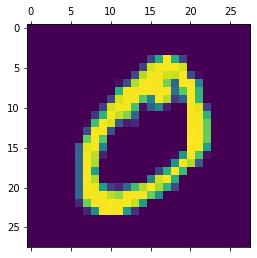

In [12]:
plt.matshow(x_train[1])

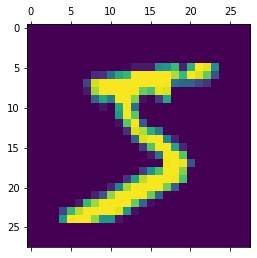

In [13]:
plt.matshow(x_train[0])

In [14]:
x_train=x_train/255
x_test=x_test/255
# scaled down 

In [15]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train[1].shape

(28, 28)

In [17]:
len(x_train)

60000

In [18]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattende=x_test.reshape(len(x_test),28*28)

In [19]:
x_test_flattende.shape

(10000, 784)

In [20]:


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 976us/step - loss: 0.4694 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.2830 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 792us/step - loss: 0.2736 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 799us/step - loss: 0.2662 - accuracy: 0.9250


In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train[1].shape)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2760 - accuracy: 0.9217


In [24]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 807us/step - loss: 0.1365 - accuracy: 0.9614


[0.13651873171329498, 0.9613833427429199]

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1443 - accuracy: 0.9578


[0.1442740112543106, 0.9577999711036682]

In [26]:
y_predicted=model.predict(x_test)

In [27]:
y_predicted[0]

array([8.2285523e-02, 9.6198916e-04, 5.4824263e-01, 8.6411643e-01,
       1.9600689e-03, 1.6043338e-01, 7.2653085e-05, 9.9966133e-01,
       7.0280254e-02, 3.0333668e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[0])
# np.argmax finds a maximum element from an array and returns the index of it

7

In [29]:
y_test[0]

7

In [30]:
np.argmax(y_predicted[342])

1

In [31]:
y_test[342]

1

In [32]:
y_test.shape

(10000,)

In [33]:
y_predicted[342]

array([0.00136125, 0.9992872 , 0.05387196, 0.47490102, 0.01073635,
       0.0931935 , 0.0116218 , 0.1119771 , 0.5886315 , 0.11826399],
      dtype=float32)

In [34]:
y_predicted_val=[np.argmax(i) for i in y_predicted]

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_val)
cm
# confusion matrix.............
# y_test- Y-truem values
# y_predicted_val- predicted values

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    0,    4,    3,    4,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    3,    1,    6,    0],
       [   4,    2,  996,    5,    2,    2,    4,    7,   10,    0],
       [   0,    1,   15,  942,    0,   21,    0,   12,   14,    5],
       [   1,    0,    7,    1,  944,    0,   10,    2,    3,   14],
       [   7,    1,    1,   11,    2,  847,    9,    1,    9,    4],
       [   8,    3,    1,    0,    2,   13,  923,    4,    4,    0],
       [   1,    8,   17,    3,    1,    1,    0,  988,    1,    8],
       [   3,    2,    5,   10,    4,    8,    5,   10,  924,    3],
       [   5,    7,    2,   11,   23,    8,    1,   17,    5,  930]],
      dtype=int32)>

In [36]:
import seaborn as sns


Text(123.0, 0.5, 'True')

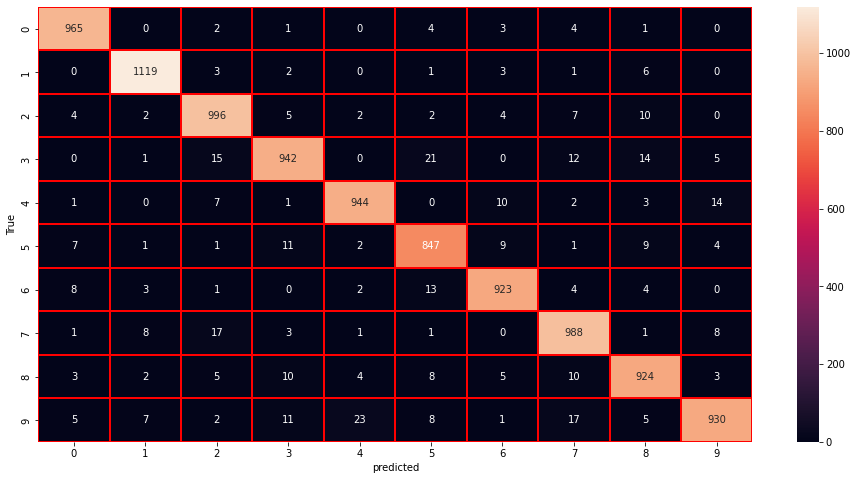

In [37]:
plt.figure(figsize=(16,8))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,linecolor='red')
plt.xlabel('predicted')
plt.ylabel('True')

In [38]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9222
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1251 - accuracy: 0.9634
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0645 - accuracy: 0.9798
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9838
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0407 - accuracy: 0.9873
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [42]:
y_pred= model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred=[np.argmax(i) for i in y_pred]
cm=confusion_matrix(y_test,y_pred)

In [46]:
cm

array([[ 963,    0,    5,    0,    0,    2,    5,    2,    1,    2],
       [   0, 1127,    2,    2,    0,    1,    1,    1,    1,    0],
       [   4,    4, 1004,    5,    1,    0,    3,    4,    7,    0],
       [   0,    0,    3,  988,    0,    3,    1,    3,    3,    9],
       [   1,    0,    3,    1,  960,    1,    4,    3,    1,    8],
       [   1,    1,    0,   12,    0,  862,   11,    1,    3,    1],
       [   3,    2,    1,    1,    3,    2,  946,    0,    0,    0],
       [   1,    2,    7,    6,    1,    0,    0, 1002,    1,    8],
       [   2,    0,    4,   12,    4,    7,    5,    4,  925,   11],
       [   2,    3,    0,    4,    9,    2,    2,    4,    0,  983]])

Text(123.0, 0.5, 'True')

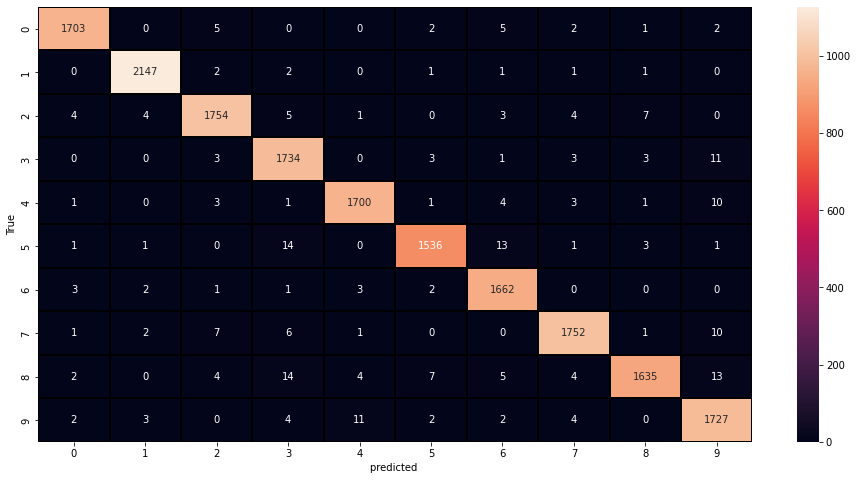

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(cm,fmt='o',annot=True,linewidths=2,linecolor='k')
plt.xlabel('predicted ')
plt.ylabel('True')

In [49]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 875us/step - loss: 0.0053 - accuracy: 0.9983


[0.005332561209797859, 0.9983333349227905]

In [50]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9761


[0.10655893385410309, 0.9761000275611877]

In [51]:
x_test[3423]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

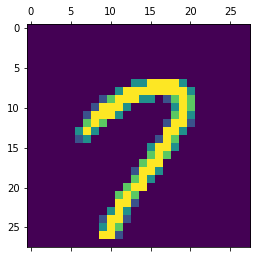

In [57]:
plt.matshow(x_test[3423])
plt.savefig('mnist1.jpg')

In [58]:
plt.imread('mnist1.jpg')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [88]:
img=plt.imread('mnist1.jpg')
img=np.asarray(img)

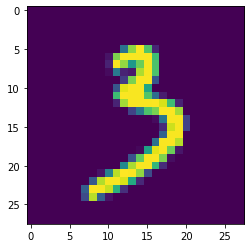

In [87]:
plt.imshow(x_test[3432])

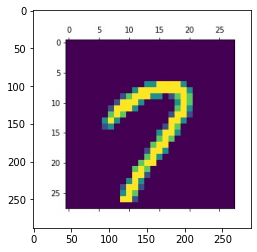

In [89]:
plt.imshow(img)